RandomForestClassifier(n_estimators=100)),

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news = fetch_20newsgroups(subset='all')
print("Number of articles: " + str(len(news.data)))
print("Number of diffrent categories: " + str(len(news.target_names)))
labels = news.target_names
print(labels);

Number of articles: 18846
Number of diffrent categories: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.3, random_state=11)
def train(classifier, X_train, y_train):
    classifier.fit(X_train, y_train);
    print("Accuracy: " + str(classifier.score(X_test, y_test)));
    return classifier

In [ ]:
#tf-idf
RFTfIdf = Pipeline([ ('vectorizer', TfidfVectorizer(use_idf=True ,stop_words=stopwords.words('english'))), ('classifier', RandomForestClassifier(n_estimators=10))])
RFTfIdfClassifier = train(RFTfIdf,X_train, y_train)
#print(naiveBayesTfIdfClassifier);

Accuracy: 0.7325787053413513


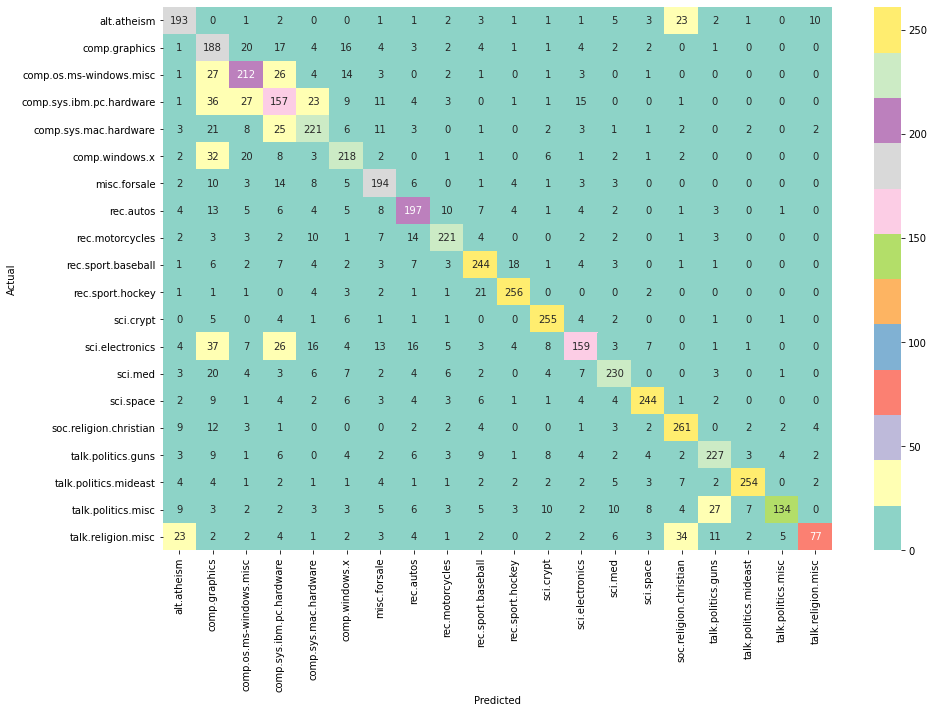

In [ ]:
y_pred_RFTfIdfClassifier = RFTfIdfClassifier.predict(X_test)
conf_mat_RFTfIdfClassifier = confusion_matrix(y_test, y_pred_RFTfIdfClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_RFTfIdfClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_RFTfIdfClassifier, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       0.72      0.77      0.75       250
           comp.graphics       0.43      0.70      0.53       270
 comp.os.ms-windows.misc       0.66      0.72      0.69       295
comp.sys.ibm.pc.hardware       0.50      0.54      0.52       289
   comp.sys.mac.hardware       0.70      0.71      0.70       312
          comp.windows.x       0.70      0.73      0.71       299
            misc.forsale       0.70      0.76      0.73       254
               rec.autos       0.70      0.72      0.71       275
         rec.motorcycles       0.82      0.80      0.81       275
      rec.sport.baseball       0.76      0.79      0.78       307
        rec.sport.hockey       0.86      0.87      0.87       293
               sci.crypt       0.84      0.90      0.87       282
         sci.electronics       0.71      0.51      0.59       314
                 sci.med       0.81      0.76      0.78       302
         

In [ ]:
#bag of words model
RFBOW = Pipeline([ ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))), ('classifier', RandomForestClassifier(n_estimators=10))])
RFBOWClassifier = train(RFBOW, news.data, news.target)

Accuracy: 0.9984082065794128


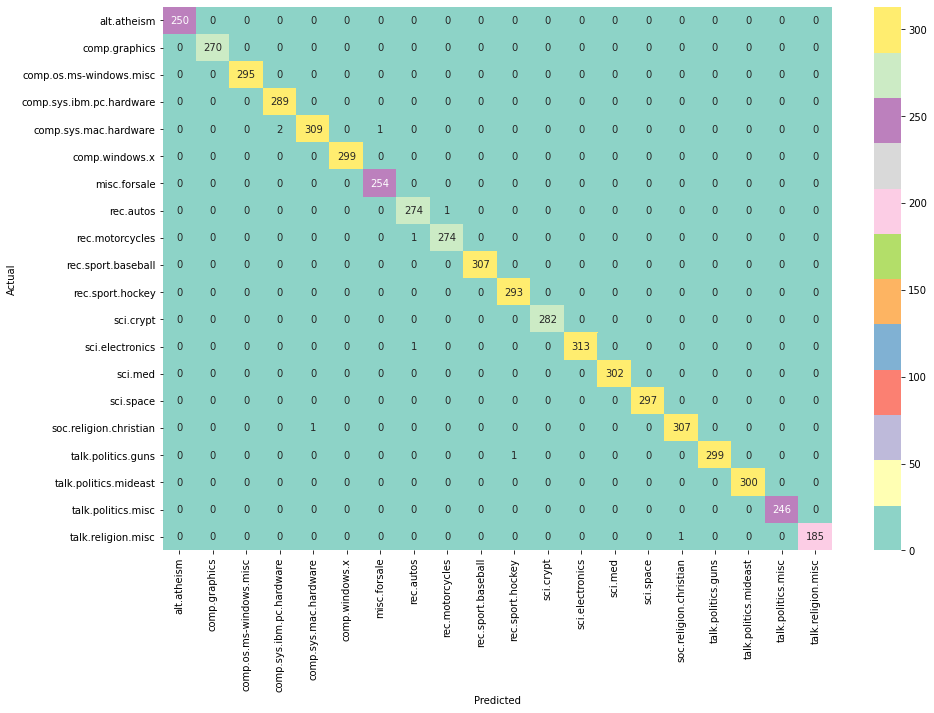

In [ ]:
y_pred_RFBOWClassifier = RFBOWClassifier.predict(X_test)
conf_mat_RFBOWClassifier = confusion_matrix(y_test, y_pred_RFBOWClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_RFBOWClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_RFBOWClassifier, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       250
           comp.graphics       1.00      1.00      1.00       270
 comp.os.ms-windows.misc       1.00      1.00      1.00       295
comp.sys.ibm.pc.hardware       0.99      1.00      1.00       289
   comp.sys.mac.hardware       1.00      0.99      0.99       312
          comp.windows.x       1.00      1.00      1.00       299
            misc.forsale       1.00      1.00      1.00       254
               rec.autos       0.99      1.00      0.99       275
         rec.motorcycles       1.00      1.00      1.00       275
      rec.sport.baseball       1.00      1.00      1.00       307
        rec.sport.hockey       1.00      1.00      1.00       293
               sci.crypt       1.00      1.00      1.00       282
         sci.electronics       1.00      1.00      1.00       314
                 sci.med       1.00      1.00      1.00       302
         

In [ ]:
#bigram  
RFBigram = Pipeline([ ('vectorizer', CountVectorizer(ngram_range = (2,2), stop_words=stopwords.words('english'))), ('classifier', RandomForestClassifier(n_estimators=10))])
RFBigramClassifier = train(RFBigram, news.data, news.target)
#print(naiveBayesBigramClassifier);

Accuracy: 0.997347010965688


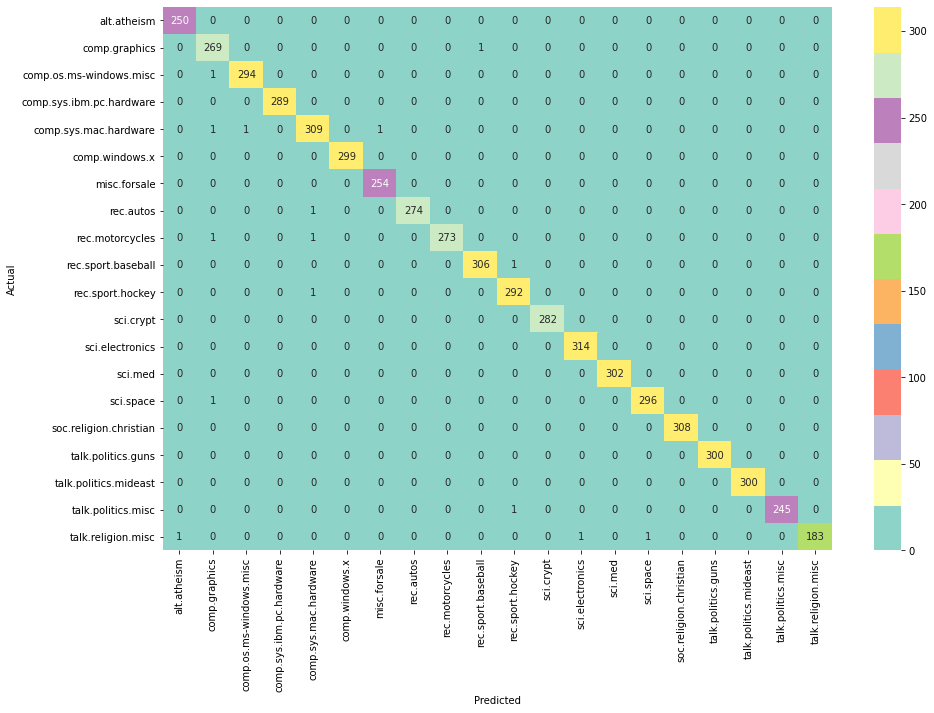

In [ ]:
y_pred_RFBigram = RFBigramClassifier.predict(X_test)
conf_mat_RFBigramClassifier = confusion_matrix(y_test, y_pred_RFBigram)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_RFBigramClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_RFBigram, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       250
           comp.graphics       0.99      1.00      0.99       270
 comp.os.ms-windows.misc       1.00      1.00      1.00       295
comp.sys.ibm.pc.hardware       1.00      1.00      1.00       289
   comp.sys.mac.hardware       0.99      0.99      0.99       312
          comp.windows.x       1.00      1.00      1.00       299
            misc.forsale       1.00      1.00      1.00       254
               rec.autos       1.00      1.00      1.00       275
         rec.motorcycles       1.00      0.99      1.00       275
      rec.sport.baseball       1.00      1.00      1.00       307
        rec.sport.hockey       0.99      1.00      0.99       293
               sci.crypt       1.00      1.00      1.00       282
         sci.electronics       1.00      1.00      1.00       314
                 sci.med       1.00      1.00      1.00       302
         

In [ ]:
#trigram
RFTrigram = Pipeline([ ('vectorizer', CountVectorizer(ngram_range = (3,3),stop_words=stopwords.words('english'))), ('classifier', RandomForestClassifier(n_estimators=10))])
RFTrigramClassifier = train(RFTrigram, news.data, news.target)
#print(SVMTrigramClassifier);

Accuracy: 0.99115670321896


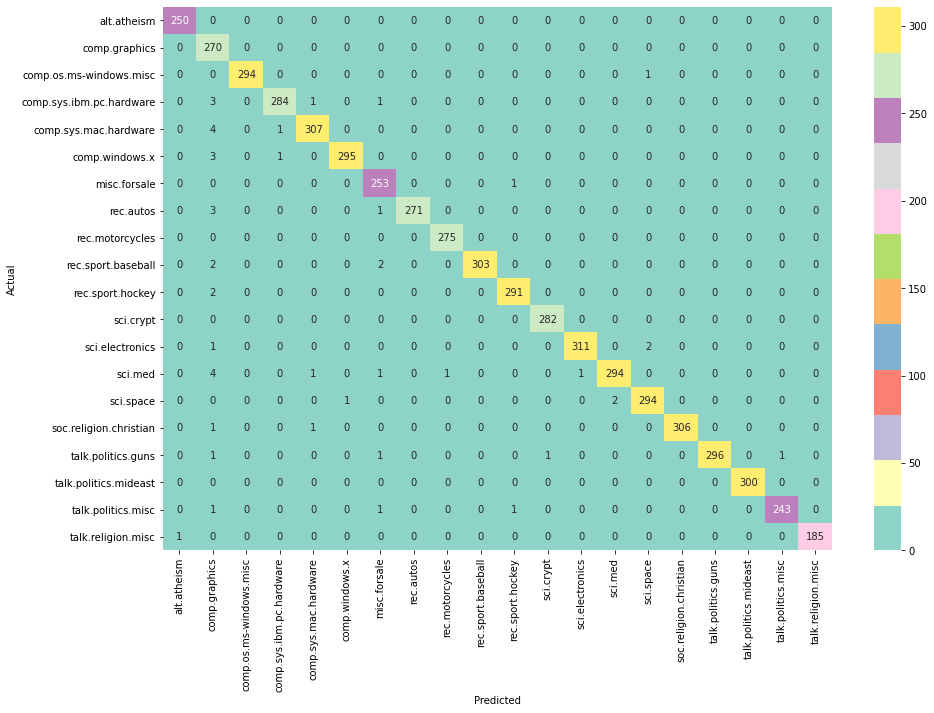

In [ ]:
y_pred_RFTrigramClassifier = RFTrigramClassifier.predict(X_test)
conf_mat_RFTrigramClassifier = confusion_matrix(y_test, y_pred_RFTrigramClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_RFTrigramClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_RFTrigramClassifier, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       250
           comp.graphics       0.92      1.00      0.96       270
 comp.os.ms-windows.misc       1.00      1.00      1.00       295
comp.sys.ibm.pc.hardware       0.99      0.98      0.99       289
   comp.sys.mac.hardware       0.99      0.98      0.99       312
          comp.windows.x       1.00      0.99      0.99       299
            misc.forsale       0.97      1.00      0.98       254
               rec.autos       1.00      0.99      0.99       275
         rec.motorcycles       1.00      1.00      1.00       275
      rec.sport.baseball       1.00      0.99      0.99       307
        rec.sport.hockey       0.99      0.99      0.99       293
               sci.crypt       1.00      1.00      1.00       282
         sci.electronics       1.00      0.99      0.99       314
                 sci.med       0.99      0.97      0.98       302
         